# Initial Model Exploration

Este notebook busca analizar qué modelo de ML de clasificación puede ser el más adecuado, para esto se usará pycaret.
A pesar de que en el PDF de problemas sugeridos este se lista como uno de regresión, aquí se buscará un modelo de clasificación ya que la target feature solo tiene 4 valores distintos.

In [1]:
import pandas as pd

#from pycaret.regression import *
from pycaret.classification import *

import joblib

pd.pandas.set_option('display.max_columns', None)

### Carga de datos

Se cargan los datasets ya generados por el EDA

In [2]:
X_train = pd.read_csv('./Datasets/xtrain.csv')
Y_train = pd.read_csv('./Datasets/ytrain.csv')

In [3]:
X_train.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'ram', 'talk_time', 'num_pix',
       'aspect_ratio'],
      dtype='object')

In [4]:
train_set = pd.concat([X_train, Y_train], axis=1)

In [5]:
train_set

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,num_pix,aspect_ratio,price_range
0,0.102273,0.32,0.000000,0.806452,0.666667,0.966667,0.428571,0.20,0.208445,0.611111,0.837020,0.204152,1
1,0.737299,0.28,0.052632,0.064516,0.444444,0.925000,0.714286,0.75,0.884019,0.000000,0.014884,0.260504,3
2,0.479947,0.20,0.000000,0.241935,0.666667,0.966667,0.571429,0.20,0.119989,0.222222,0.121401,0.245989,0
3,0.188503,0.48,0.473684,0.403226,0.222222,0.583333,0.714286,0.55,0.248263,0.222222,0.145942,0.239216,0
4,0.566176,0.32,0.000000,0.661290,0.333333,0.300000,0.571429,0.30,0.977552,0.333333,0.022978,0.276471,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,0.271390,0.36,0.157895,0.645161,0.111111,0.591667,0.000000,0.80,0.087654,0.222222,0.018974,0.855615,0
1577,0.217246,0.00,0.000000,0.887097,0.444444,0.458333,0.142857,0.00,0.017905,0.277778,0.045032,0.138408,0
1578,0.814171,0.64,0.000000,0.806452,0.000000,0.891667,0.285714,0.05,0.629075,0.500000,0.052576,0.052941,2
1579,0.375668,0.24,0.000000,0.387097,0.777778,0.175000,0.571429,0.10,0.949492,0.166667,0.380844,0.993080,3


### Aplicación de Pycaret

In [6]:
classificator_py = setup(train_set, target = 'price_range', session_id=123)

,Description,Value
0,Session id,123
1,Target,price_range
2,Target type,Multiclass
3,Original data shape,"(1581, 13)"
4,Transformed data shape,"(1581, 13)"
5,Transformed train set shape,"(1106, 13)"
6,Transformed test set shape,"(475, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


In [7]:
models = compare_models(fold=5, exclude=['lightgbm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9168,0.0000,0.9168,0.9185,0.9165,0.8891,0.8899,0.0100
lda,Linear Discriminant Analysis,0.9141,0.0000,0.9141,0.9169,0.9145,0.8854,0.8861,0.0100
gbc,Gradient Boosting Classifier,0.8852,0.0000,0.8852,0.8867,0.8852,0.8469,0.8474,0.2140
rf,Random Forest Classifier,0.8725,0.9772,0.8725,0.8734,0.8723,0.8300,0.8305,0.0640
lr,Logistic Regression,0.8717,0.0000,0.8717,0.8709,0.8696,0.8289,0.8300,0.3260
et,Extra Trees Classifier,0.8635,0.9753,0.8635,0.8636,0.8628,0.8180,0.8184,0.0520
dt,Decision Tree Classifier,0.8409,0.8937,0.8409,0.8420,0.8405,0.7878,0.7884,0.0120
nb,Naive Bayes,0.8029,0.9486,0.8029,0.8037,0.8022,0.7371,0.7378,0.0100
svm,SVM - Linear Kernel,0.7333,0.0000,0.7333,0.7062,0.7041,0.6443,0.6628,0.0140
ada,Ada Boost Classifier,0.6293,0.0000,0.6293,0.6928,0.5941,0.5035,0.5346,0.0340


> Se elige **Random Forest Classifier** debido a que es el primer modelo con buen rendimiento general con **AUC** no nulo.

In [8]:
mejor_modelo = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8468,0.9777,0.8468,0.8485,0.8434,0.7956,0.7983
1,0.8649,0.9762,0.8649,0.8634,0.8637,0.8198,0.8201
2,0.8919,0.9744,0.8919,0.8926,0.8908,0.8559,0.8568
3,0.8378,0.9773,0.8378,0.8394,0.8366,0.7838,0.7851
4,0.8649,0.9743,0.8649,0.8661,0.8636,0.8199,0.8210
5,0.9189,0.9820,0.9189,0.9219,0.9194,0.8919,0.8925
6,0.8455,0.9785,0.8455,0.8506,0.8468,0.7938,0.7946
7,0.8727,0.9810,0.8727,0.8731,0.8718,0.8303,0.8310
8,0.8636,0.9717,0.8636,0.8674,0.8635,0.8181,0.8195


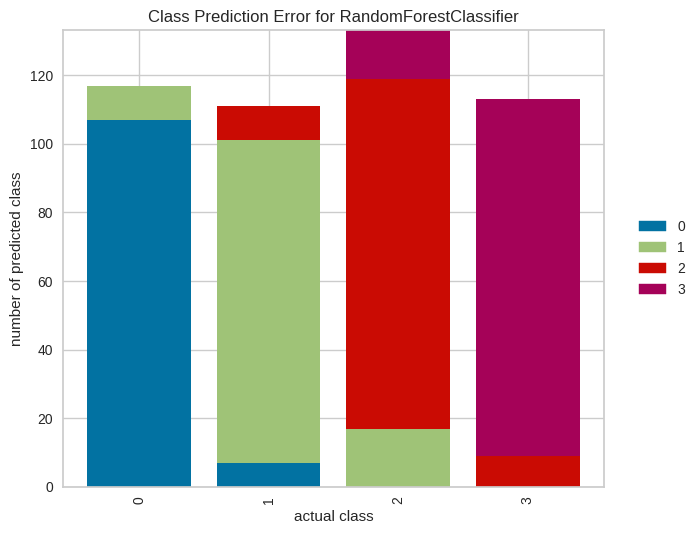

In [9]:
plot_model(mejor_modelo, plot = 'error')

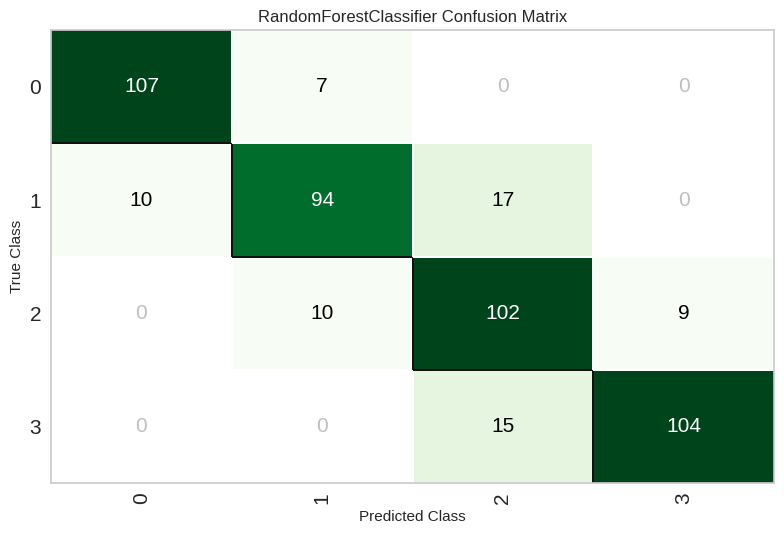

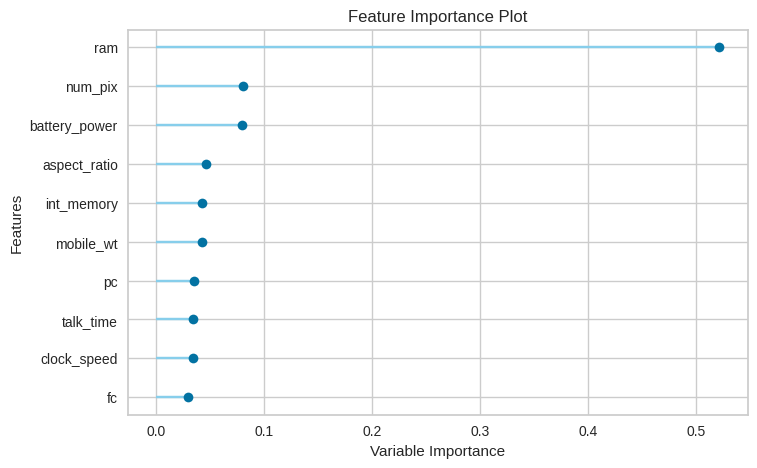

In [10]:
plot_model(mejor_modelo, plot='confusion_matrix')  # Graficar confusion matrix
plot_model(mejor_modelo, plot='feature')

> Se observa que las nuevas features tienen bastante importancia

In [11]:
pd.Series(mejor_modelo.feature_importances_, index= X_train.columns) \
.sort_values(ascending= False)

ram              0.521460
num_pix          0.080303
battery_power    0.079758
aspect_ratio     0.046195
int_memory       0.043127
mobile_wt        0.042966
pc               0.035419
talk_time        0.034704
clock_speed      0.034318
fc               0.029724
m_dep            0.026917
n_cores          0.025110
dtype: float64

In [12]:
# Estos parámetros se usarán para entrenar el modelo que se usará en el pipeline finalmente.
mejor_modelo.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}